# Step 1: mechanics with Euler-Lagrange

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from numpy import logical_and as npand
from numpy import logical_or as npor
import matplotlib

In [2]:
from sympy import (symbols, pi, I, E, cos, sin, exp, tan, simplify, expand, factor, collect,
                   apart, cancel, expand_trig, diff, Derivative, Function, integrate, limit,
                   series, Eq, solve, dsolve, Matrix, N, preorder_traversal, Float, solve_linear_system,
                   eye, zeros, lambdify, Symbol,hessian)
from sympy.physics.mechanics import dynamicsymbols, init_vprinting

In [3]:
from sympy.physics.mechanics import LagrangesMethod, Lagrangian, ReferenceFrame, Point, Particle

In [4]:
from matplotlib import animation, rc
import matplotlib.patches as patches
from matplotlib.transforms import Affine2D
from IPython.display import HTML

In [5]:
from optibot.symbolic import lagrange, diff_to_symb
from optibot.numpy import unpack

In [6]:
matplotlib.rcParams['animation.embed_limit'] = 200

In [7]:
init_vprinting()

In [8]:
m0, m1, m2, l1, l2, l3, t, g, k = symbols('m_0 m_1 m_2 l_1 l_2 l_3 t g k')

In [9]:
q0, q1, q2 = dynamicsymbols('q_0 q_1 q_2')
q0, q1, q2

In [10]:
N = ReferenceFrame('N')
pN = Point('N*')
pN.set_vel(N, 0)

P = pN.locatenew('P', q0 * N.x)
P.set_vel(N, q0.diff(t) * N.x)
cart_part = Particle('CartPart', P, m0)
cart_part.potential_energy = m0 * g * P.pos_from(pN).dot(N.y)

N1 = N.orientnew('N1', 'Axis', [q1, N.z])
P1 = P.locatenew('P1', -l1*N1.y)
P1.set_vel(N, P1.pos_from(pN).dt(N))

pend_part_1 = Particle('PendPart', P1, m1)
pend_part_1.potential_energy = (m1 * g * P1.pos_from(pN).dot(N.y) + k*(q1-q2)**2/2)

N2 = N.orientnew('N2', 'Axis', [q2, N.z])
P2 = P1.locatenew('P2', -l2*N2.y)
P2.set_vel(N, P2.pos_from(pN).dt(N))

pend_part_2 = Particle('PendPart', P2, m2)
pend_part_2.potential_energy = m2 * g * P2.pos_from(pN).dot(N.y)

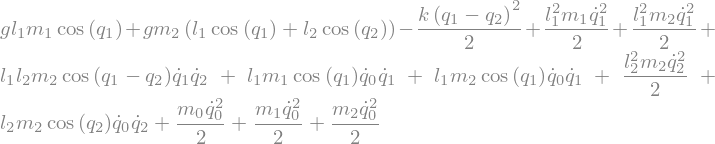

In [11]:
Lag = simplify(Lagrangian(N, cart_part, pend_part_1, pend_part_2))
Lag

In [12]:
u0, u1, u2 = symbols('u_0 u_1 u_2')
FL = [(P, u0 * N.x), (N1, u1 * N.z), (N2, u2 * N.z)]
#LM_ej = LagrangesMethod(Lag, [q0, q1, q2], forcelist=FL, frame=N)

In [13]:
from optibot.symbolic import SimpLagrangesMethod

In [14]:
LM_simp = SimpLagrangesMethod(Lag, [q0, q1, q2], forcelist=FL, frame=N)

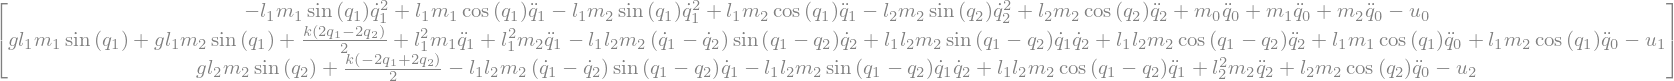

In [15]:
LM_simp.form_lagranges_equations()

Generating M_inv
simplifying M_inv
simplifying RHS
Model completed


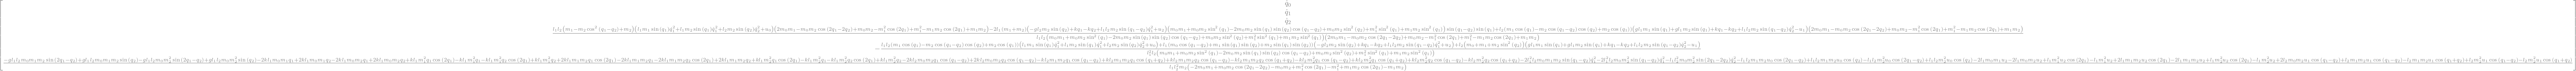

In [16]:
RHS = LM_simp.rhs
RHS

In [16]:
from optibot.symbolic import get_lagr_eqs, lagr_to_RHS, print_funcs

In [17]:
N = ReferenceFrame('N')
pN = Point('N*')
pN.set_vel(N, 0)

P = pN.locatenew('P', q0 * N.x)
P.set_vel(N, q0.diff(t) * N.x)
cart_part = Particle('CartPart', P, m0)
cart_part.potential_energy = m0 * g * P.pos_from(pN).dot(N.y)

N2 = N.orientnew('N2', 'Axis', [q1, N.z])
P1 = P.locatenew('P1', -l3*N2.y)
P1.set_vel(N, P1.pos_from(pN).dt(N))

pend_part = Particle('PendPart', P1, m2)
pend_part.potential_energy = m2 * g * P1.pos_from(pN).dot(N.y)

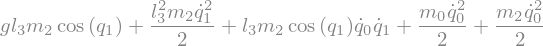

In [18]:
Lag_simp = Lagrangian(N, cart_part, pend_part)
Lag_simp

In [19]:
u0, u1 = symbols('u_0, u_1')
FL = [(P, u0 * N.x), (N2, u1 * N.z)]
LM_small = SimpLagrangesMethod(Lag_simp, [q0, q1], forcelist=FL, frame=N)

Generating M_inv
simplifying M_inv
simplifying RHS
Model completed


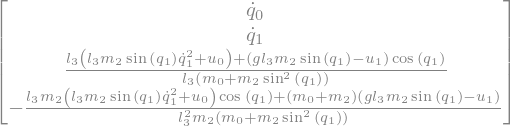

In [20]:
LM_small.form_lagranges_equations()
RHS_small = simplify(LM_small.rhs)
RHS_small

In [21]:
LM_small.eom[0]

In [22]:
print_funcs([LM_small.eom[0]], 2)

def F(x, u, params, ):
    q_0, q_1, v_0, v_1 = unpack(x)
    u_0 = unpack(u)
    a_0, a_1, l_3, m_0, m_2 = params
    result = a_0*m_0 + a_0*m_2 + a_1*l_3*m_2*np.cos(q_1) - l_3*m_2*v_1**2*np.sin(q_1) - u_0

    return result



'def F(x, u, params, ):\n    q_0, q_1, v_0, v_1 = unpack(x)\n    u_0 = unpack(u)\n    a_0, a_1, l_3, m_0, m_2 = params\n    result = a_0*m_0 + a_0*m_2 + a_1*l_3*m_2*np.cos(q_1) - l_3*m_2*v_1**2*np.sin(q_1) - u_0\n\n    return result\n'

In [23]:
print_funcs([LM_small.eom[1]], 2)

def F(x, u, params, ):
    q_0, q_1, v_0, v_1 = unpack(x)
    u_1 = unpack(u)
    a_0, a_1, g, l_3, m_2 = params
    result = a_0*l_3*m_2*np.cos(q_1) + a_1*l_3**2*m_2 + g*l_3*m_2*np.sin(q_1) - u_1

    return result



'def F(x, u, params, ):\n    q_0, q_1, v_0, v_1 = unpack(x)\n    u_1 = unpack(u)\n    a_0, a_1, g, l_3, m_2 = params\n    result = a_0*l_3*m_2*np.cos(q_1) + a_1*l_3**2*m_2 + g*l_3*m_2*np.sin(q_1) - u_1\n\n    return result\n'

In [24]:
def lagr_f_simp_0(x, params, ):
    q_0, q_1, v_0, v_1 = unpack(x)
    a_0, a_1, l_3, m_0, m_2 = params
    result = a_0*m_0 + a_0*m_2 + a_1*l_3*m_2*np.cos(q_1) - l_3*m_2*v_1**2*np.sin(q_1)

    return result

def lagr_f_simp_1(x, params, ):
    q_0, q_1, v_0, v_1 = unpack(x)
    a_0, a_1, g, l_3, m_2 = params
    result = a_0*l_3*m_2*np.cos(q_1) + a_1*l_3**2*m_2 + g*l_3*m_2*np.sin(q_1)

    return result



## Casadi

In [25]:
import casadi as cas

In [26]:
from optibot.casadi import RHS2casF

In [27]:
from optibot.numpy import RHS2numpy, trapz_integrate, num_derivative

In [28]:
from optibot.schemes import euler_restr, trapz_restr, trapz_mod_restr, hs_mod_restr, hs_restr
from optibot.casadi import restriction2casadi

In [29]:
from optibot.schemes import integrate_euler, integrate_hs, integrate_trapz, integrate_rk4

### Cartpole simple

In [30]:
def create_anim_simp(X, U, params):
    g, l_3, m_0, m_2 = params
    N = X.shape[0]
    fig, ax = plt.subplots()
    
    y_scale = l_3 * 1.25
    min_x_cart = np.min(X[:,0])
    max_x_cart = np.max(X[:,0])
    cart_displ = max_x_cart-min_x_cart
    size_x = 2*y_scale + cart_displ
    size_y = 2*y_scale
    draw_width = 14
    draw_height = draw_width / size_x * size_y
    
    x_0 = X[:,0]
    y_0 = np.zeros_like(x_0)
    x_1 = x_0 + l_3*np.sin(X[:,1])
    y_1 = y_0 - l_3*np.cos(X[:,1])
    
    x_cm = (m_0 * x_0 + m_2 * x_1)/(m_0 + m_2)
    y_cm = (m_0 * y_0 + m_2 * y_1)/(m_0 + m_2)

    fig.set_size_inches([draw_width,draw_height])
    ax.set_xlim(( min_x_cart-y_scale, max_x_cart+y_scale))
    ax.set_ylim(( -y_scale, y_scale))

    circle1 = plt.Circle((0, 0), l_3, color='b', ls = ":", fill=False)
    ax.add_artist(circle1)
    ax.plot([min_x_cart - l_3, max_x_cart + l_3], [0,0], 'k', lw=1, ls = ':')

    line1, = ax.plot([], [], lw=2)
    line3, = ax.plot([], [], 'k', lw=1, ls = ':')
    line_cm, = ax.plot([], [], 'g', lw=1, ls = ':')
    point0, = ax.plot([], [], marker='o', markersize=15, color="red")
    point1, = ax.plot([], [], marker='o', markersize=15, color="red")
    point_cm, = ax.plot([], [], marker='o', markersize=10, color="green")
    u_max = max(np.max(np.abs(U[:,0])),1e-15)
    arrow_w = 0.05*l_3
    arrow_l = 0.2*l_3
    u_arrow = patches.Arrow(0, 0, 0, -arrow_l, color = 'gray',width = arrow_w)
    ax.add_patch(u_arrow)
    
    print_vars = [X[:,0], X[:,1], U[:,0], U[:,1], np.linspace(0, N-1, N, dtype=int)]
    print_var_names = ['q_0', 'q_1', 'u_0', 'u_1', 'step']
    texts = []
    ii = 0
    for arr in print_vars:
        texts.append(ax.text(0.2, ii, "", fontsize = 12))
        ii -= 0.08*l_3
    
    def init():
        line1.set_data([], [])
        line3.set_data([], [])
        line_cm.set_data([], [])
        point1.set_data([], [])
        circle1.center = (0, 0)
        return (line1,)
    def animate(i):
        circle1.center = (x_0[i], y_0[i])
        point0.set_data(x_0[i], y_0[i])
        line1.set_data([x_0[i], x_1[i]], [y_0[i], y_1[i]])    
        point1.set_data(x_1[i], y_1[i])
        point_cm.set_data(x_cm[i], y_cm[i])
        line3.set_data(x_1[:i], y_1[:i])
        line_cm.set_data(x_cm[:i], y_cm[:i])
        trans = Affine2D()
        u_arrow._patch_transform = trans.scale(U[i,0] * arrow_l / u_max, arrow_w).translate(x_0[i],0)
        for ii in range(len(texts)):
            text = texts[ii]
            name = print_var_names[ii]
            arr = print_vars[ii]
            text.set_text("$" + name + "$ = %.6f" % arr[i])
        return (line1,u_arrow)
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=N, interval=20, 
                               blit=True)
    return anim

In [31]:
F_cas_simp = RHS2casF(RHS_small[2:], 2)

Function Arguments:
	x: [q_0, q_1, v_0, v_1]
	u: [u_0, u_1]
	params: [g, l_3, m_0, m_2]



In [32]:
F_cas_simp([1,1,1,1], [1,1], [1,1,1,1])

DM([[1, 1, 1.02795, -0.396876]])

In [33]:
F_nump_simp = RHS2numpy(RHS_small[2:], 2)

Function Arguments:
	x: [q_0, q_1, v_0, v_1]
	u: [u_0, u_1]
	params: [g, l_3, m_0, m_2]



In [34]:
F_nump_simp([1,1,1,1], [1,1], [1,1,1,1])

array([ 1.        ,  1.        ,  1.02795194, -0.39687579])

### Generate initial solution

In [35]:
from optibot.schemes import trapz_step, hs_mod_step

In [36]:
x_0 = np.array([0, np.pi, 0, 0])
f_max = 1
u_0 = np.array([f_max, 0])

m_0, m_2 = [0.2, 0.4]
l_3 = 0.3
g = 9.8
params = [g, l_3, m_0, m_2]

dt = 0.01

#x_1 = trapz_step(x_0, u_0, u_0, F_nump_simp, dt, params)
x_1 = hs_mod_step(x_0, u_0, u_0, F_nump_simp, dt, params)
x_1

array([2.50136095e-04, 3.14242667e+00, 5.00544287e-02, 1.66938870e-01])

In [37]:
x = [x_0, x_1,]
u = [u_0, u_0,]

for ii in range(799):
    x_i = x[-1]
    u_i = u[-1]
    nat_x_n = hs_mod_step(x_i, u_i, np.array([0.,0.]), F_nump_simp, dt, params)
    v_med = (x_i[2] + nat_x_n[2])/2
    u_n = np.array([-f_max*np.sign(v_med), 0.])
    x_n = trapz_step(x_i, u_i, u_n, F_nump_simp, dt, params)
    x.append(x_n)
    u.append(u_n)
x = np.array(x)
u = np.array(u)
    

anim_simp = create_anim_simp(x,u,[g, l_3, m_0, m_2])

HTML(anim_simp.to_jshtml())

In [38]:
N = 800

opti = cas.Opti()
p_opts = {"expand":True}
s_opts = {"max_iter": 10000, 'tol': 1e-16}#, 'linear_solver' : "MA27"}
opti.solver("ipopt",p_opts,
                    s_opts)

X = opti.variable(N+1,4)
U = opti.variable(N+1,2)
T = opti.parameter()
u_m = opti.parameter(2)

Params = opti.parameter(4)

#cost = cas.sum1(2+cas.cos(X[:,0])+cas.cos(X[:,1]))*T
cost = cas.sum1(-cas.cos(X[:,1])) + cas.sum1(X[:,0]**2) + cas.sum1(cas.sin(X[:,1])**2)
#cost = cas.sum1(cas.cos(X[:,1]))
#cost = T
opti.minimize(cost)

opti.subject_to(X[0,:].T == [0, np.pi, 0, 0])
opti.subject_to(opti.bounded(-0.0001,X[-1,0],0.0001))
opti.subject_to(cas.cos(X[-1,1]) > 0.9999)
opti.subject_to(opti.bounded(-0.0001,X[-1,2],0.0001))
opti.subject_to(opti.bounded(-0.0001,X[-1,3],0.0001))
opti.subject_to(U[-1,:].T == [0, 0])

#restriction = restriction2casadi(euler_restr, F_cas, 2, 2, 4)
#restriction = restriction2casadi(trapz_restr, F_cas_simp, 2, 2, 4)
restriction = restriction2casadi(trapz_mod_restr, F_cas_simp, 2, 2, 4)

for ii in range(N):
    opti.subject_to(restriction(X[ii,:], X[ii+1,:], U[ii,:], U[ii+1,:],T/N, Params)==0)
    opti.subject_to(opti.bounded(-u_m[0],U[ii, 0],u_m[0]))
    opti.subject_to(opti.bounded(-u_m[1],U[ii, 1],u_m[1]))

opti.set_initial(X, x)
opti.set_initial(U, u)

In [39]:
opti.set_value(T, dt*(N+1))
max_par_1 = 0.0
max_f = 1.0
opti.set_value(u_m, [max_f, max_par_1])

m_0, m_2 = [0.2, 0.4]
l_3 = 0.3
g = 9.8

opti.set_value(Params, [g, l_3, m_0, m_2])

In [40]:
sol = opti.solve()


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    30406
Number of nonzeros in inequality constraint Jacobian.:      804
Number of nonzeros in Lagrangian Hessian.............:     4806

Total number of variables............................:     4806
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equal

  81 -3.0577456e+02 2.35e-01 7.36e+01  -1.0 1.55e+00  -1.5 1.00e+00 1.00e+00f  1
  82 -3.1024667e+02 3.13e-01 1.09e+02  -1.0 6.14e+00    -  2.88e-01 2.25e-01f  1
  83 -3.1330619e+02 2.58e-01 8.38e+01  -1.0 3.40e+00  -2.0 3.68e-01 2.95e-01f  1
  84 -3.1696155e+02 2.71e-01 7.42e+01  -1.0 1.13e+01  -2.5 9.06e-02 8.79e-02f  1
  85 -3.1977584e+02 2.75e-01 6.55e+01  -1.0 6.18e+00  -2.1 1.78e-01 2.02e-01f  1
  86 -3.1998525e+02 3.33e-01 9.09e+01  -1.0 2.73e+00  -1.6 6.36e-01 7.55e-01f  1
  87 -3.2239008e+02 3.09e-01 8.82e+01  -1.0 9.20e+00  -2.1 1.40e-01 8.54e-02f  1
  88 -3.2315686e+02 2.77e-01 6.68e+01  -1.0 3.33e+00  -1.7 4.12e-01 4.29e-01f  1
  89 -3.2573575e+02 2.99e-01 7.09e+01  -1.0 7.08e+00  -2.2 1.74e-01 1.63e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  90 -3.2630138e+02 2.50e-01 5.50e+01  -1.0 3.98e+00  -1.7 6.22e-01 2.50e-01f  1
  91 -3.2847765e+02 2.54e-01 5.48e+01  -1.0 1.42e+02  -2.2 6.39e-03 9.96e-03f  1
  92 -3.2519677e+02 2.74e-01

In [ ]:
xx_simp = sol.value(X)
uu_simp = sol.value(U) 

In [ ]:
new_X_simp = xx_simp
new_U_simp = uu_simp

In [ ]:
#anim_simp = create_anim_simp(xx_simp,uu_simp,[g, l_3, m_0, m_2])

In [ ]:
#HTML(anim_simp.to_jshtml())

In [ ]:
_n = 360
_n_int = 40
print(new_X_simp[_n:_n+_n_int,:])

In [ ]:
print(new_X_simp[_n:_n+_n_int,0]**2 + 1 
      - np.cos(new_X_simp[_n:_n+_n_int,1]) 
      + new_X_simp[_n:_n+_n_int,2]**2 
      + new_X_simp[_n:_n+_n_int,3]**2)

In [ ]:
_n = 0
_n_int = 430
plt.figure(figsize=[12,8])
plt.plot(new_X_simp[_n:_n+_n_int,0]**2 + 1 
      - np.cos(new_X_simp[_n:_n+_n_int,1]) 
      + new_X_simp[_n:_n+_n_int,2]**2 
      + new_X_simp[_n:_n+_n_int,3]**2)
plt.grid()

In [ ]:
_n = 0
_n_int = 430
plt.figure(figsize=[12,8])
plt.plot(new_X_simp[_n:_n+_n_int,0]**2 + 1 
      - np.cos(new_X_simp[_n:_n+_n_int,1]) 
      + new_X_simp[_n:_n+_n_int,2]**2 
      + new_X_simp[_n:_n+_n_int,3]**2)
plt.ylim([0,1])
plt.grid()

In [ ]:
_n = 0
_n_int = 430
plt.figure(figsize=[12,8])
plt.plot(new_X_simp[_n:_n+_n_int,0]**2 + 1 
      - np.cos(new_X_simp[_n:_n+_n_int,1]) 
      + new_X_simp[_n:_n+_n_int,2]**2 
      + new_X_simp[_n:_n+_n_int,3]**2)
plt.ylim([0,0.1])
plt.grid()

In [ ]:
n_cut = 385
n_adicc = 50
N = 800

In [ ]:
new_X_simp = xx_simp[:n_cut, :]
new_U_simp = uu_simp[:n_cut, :]

In [ ]:
new_X_simp = new_X_simp[::-1, :]
new_U_simp = new_U_simp[::-1, :]

In [ ]:
new_X_simp[:,1] = new_X_simp[:,1] - 2*np.pi

In [ ]:
from optibot.schemes import interpolated_array

In [ ]:
new_t_array = np.linspace(0, (n_cut-1)*dt, N-n_adicc+1)
new_X_interp, new_U_interp = interpolated_array(new_X_simp, new_U_simp, F_nump_simp, dt,
                                  new_t_array, [g, l_3, m_0, m_2], 'hs_mod')

In [ ]:
new_U_interp_comp = np.concatenate((new_U_interp, np.zeros([n_adicc,2])))

In [ ]:
new_U_interp_comp.shape

In [ ]:
compr_sol_simp = integrate_trapz(
    new_X_interp[0,:],
    new_U_interp_comp,
    F_nump_simp,
    new_t_array[-1]/(N-n_adicc),
    [g, l_3, m_0, m_2]
)

In [ ]:
#anim_simp = create_anim_simp(compr_sol_simp[:-1,:],new_U_interp_comp,[g, l_3, m_0, m_2])

In [ ]:
#HTML(anim_simp.to_jshtml())

In [ ]:
opti = cas.Opti()
opti.solver('ipopt')

X = opti.variable(N+1,4)
U = opti.variable(N+1,2)
T = opti.parameter()
u_m = opti.parameter(2)

Params = opti.parameter(4)

#cost = cas.sum1(2+cas.cos(X[:,0])+cas.cos(X[:,1]))*T
#cost = cas.sum1(cas.cos(X[:,1])) + cas.sum1(X[:,0]**2) + cas.sum1(cas.sin(X[:,1])**2)
cost = cas.sum1(cas.cos(X[:,1]))
#cost = T
opti.minimize(cost)

opti.subject_to(X[0,:].T == [0, 0, 0, 0])
opti.subject_to(opti.bounded(-0.0001,X[-1,0],0.0001))
opti.subject_to(cas.cos(X[-1,1]) < -0.9999)
opti.subject_to(opti.bounded(-0.0001,X[-1,2],0.0001))
opti.subject_to(opti.bounded(-0.0001,X[-1,3],0.0001))
opti.subject_to(opti.bounded(-u_m, U[-1, :].T, u_m))

#restriction = restriction2casadi(euler_restr, F_cas, 2, 2, 4)
restriction = restriction2casadi(trapz_restr, F_cas_simp, 2, 2, 4)
#restriction = restriction2casadi(hs_restr, F_cas, 2, 2, 4)

for ii in range(N):
    opti.subject_to(restriction(X[ii,:], X[ii+1,:], U[ii,:], U[ii+1,:],T/N, Params)==0)
    opti.subject_to(opti.bounded(-u_m, U[ii, :].T,u_m))

opti.set_initial(X, compr_sol_simp[:-1, :])
opti.set_initial(U, new_U_interp_comp)

In [ ]:
opti.set_value(T, (n_cut-1 + n_adicc*n_cut/N)*dt)
max_par_1 = 0.0
max_f = 1.0
opti.set_value(u_m, [max_f, max_par_1])

m_0, m_2 = [0.2, 0.4]
l_3 = 0.3
g = 9.8

opti.set_value(Params, [g, l_3, m_0, m_2])

In [ ]:
sol = opti.solve()

In [ ]:
xx_new = sol.value(X)
uu_new = sol.value(U) 

In [ ]:
xx_new

In [ ]:
#anim_simp = create_anim_simp(xx_new,uu_new,[g, l_3, m_0, m_2])

In [ ]:
#HTML(anim_simp.to_jshtml())

In [ ]:
opti = cas.Opti()
p_opts = {"expand":True}
s_opts = {"max_iter": 10000, 'tol': 1e-12}
opti.solver("ipopt",p_opts,
                    s_opts)

In [ ]:
X = opti.variable(N+1,4)
U = opti.variable(N+1,2)
H = opti.variable(N)
u_m = opti.parameter(2)

In [ ]:
#M = opti.parameter(2)
#L = opti.parameter(2)
#G = opti.parameter()
Params = opti.parameter(4)

In [ ]:
#cost = cas.sum1(2+cas.cos(X[:,0])+cas.cos(X[:,1]))*T
#cost = cas.sum1(cas.cos(X[:,1])) + cas.sum1(X[:,0]**2)
#cost = cas.sum1(cas.cos(X[:,1]))
cost = cas.sum1(H)
opti.minimize(cost)

In [ ]:
opti.subject_to(X[0,:].T == [0, 0, 0, 0])
opti.subject_to(opti.bounded(-0.0001,X[-1,0],0.0001))
opti.subject_to(cas.cos(X[-1,1]) < -0.9999)
opti.subject_to(opti.bounded(-0.0001,X[-1,2],0.0001))
opti.subject_to(opti.bounded(-0.0001,X[-1,3],0.0001))
opti.subject_to(opti.bounded(-u_m, U[-1, :].T, u_m))

In [ ]:
#restriction = restriction2casadi(euler_restr, F_cas_simp, 2, 2, 4)
restriction = restriction2casadi(trapz_restr, F_cas_simp, 2, 2, 4)
#restriction = restriction2casadi(hs_restr, F_cas, 2, 2, 4)

In [ ]:
for ii in range(N):
    opti.subject_to(restriction(X[ii,:], X[ii+1,:], U[ii,:], U[ii+1,:],H[ii], Params)==0)
    #opti.subject_to(opti.bounded(-1e-6, restriction(X[ii,:], X[ii+1,:], U[ii,:], U[ii+1,:],H[ii], Params),1e-6))
    opti.subject_to(opti.bounded(-u_m, U[ii, :].T,u_m))
for ii in range(N-1):
    opti.subject_to(H[ii] == H[ii+1])

In [ ]:
compr_sol_simp.shape

In [ ]:
opti.set_initial(X, compr_sol_simp[:-1, :])
opti.set_initial(U, new_U_interp_comp)

In [ ]:
opti.set_initial(H, (n_cut-1)*dt/(N-n_adicc-1))

opti.subject_to(H > 0.5/N)
opti.subject_to(H < 10/N)

max_par_1 = 0.0
max_f = 1.0
opti.set_value(u_m, [max_f, max_par_1])

m_0, m_2 = [0.2, 0.4]
l_3 = 0.3
g = 9.8

opti.set_value(Params, [g, l_3, m_0, m_2])

In [ ]:
sol = opti.solve()

opti.debug.show_infeasibilities()


spar_hs_mod = sol.value(cas.jacobian(opti.g,opti.x)).toarray()
plt.figure(figsize = [14,14])
plt.spy(spar_hs_mod)

In [ ]:
xx_simp_t = sol.value(X)
uu_simp_t = sol.value(U) 

In [ ]:
new_X_simp = xx_simp_t
new_U_simp = uu_simp_t

In [ ]:
anim_simp = create_anim_simp(xx_simp_t,uu_simp_t,[g, l_3, m_0, m_2])

In [ ]:
HTML(anim_simp.to_jshtml())

In [ ]:
opt_T = float(cas.sum1(sol.value(H)))
opt_T

In [ ]:
N*(n_cut-1)*dt/(N-n_adicc-1)

In [ ]:
plt.plot(new_U_simp)

lagr_f_simp_0(compr_sol_simp[324], [a_0, a_1, l_3, m_0, m_2], )


lagr_f_simp_1(compr_sol_simp[324], [a_0, a_1, g, l_3, m_2], )

### Interpolation

In [ ]:
from optibot.schemes import interpolated_array

In [ ]:
from optibot.numpy import trapz_integrate, num_derivative

In [ ]:
new_t_array = np.linspace(0, opt_T, 2*N)

In [ ]:
h = opt_T/N

old_t_array = np.linspace(0, (xx_simp_t.shape[0] - 1) * h, xx_simp_t.shape[0])

In [ ]:
new_X_interp, new_U_interp = interpolated_array(xx_simp_t, uu_simp_t, F_nump_simp, h,
                                  new_t_array, [g, l_3, m_0, m_2], 'trapz')

In [ ]:
accelerations = F_nump_simp(xx_simp_t, uu_simp_t,[g, l_3, m_0, m_2])
accelerations

In [ ]:
aa = 2
plt.figure(figsize=[50,20])
plt.plot(old_t_array,np.array(xx_simp_t)[:,aa]/2, label = f'soluc integrada con trapz, componente{aa}')
plt.plot(old_t_array,accelerations[:,aa]/40, label = f'aceleraciones, componente{aa}')
plt.plot(old_t_array,accelerations[:,0]/2, label = f'aceleraciones, componente 0')
#plt.plot(old_t_array,np.array(compr_sol_simp)[:-1,0], label = f'soluc integrada, componente 0')
#plt.plot(new_t_array,new_X_interp[:,aa], label = f'soluc interpolada, componente{aa}')
plt.plot([0, old_t_array[-1] + l_3], [0,0], 'k', lw=1, ls = ':')
plt.legend()

In [ ]:
aa = 2
plt.figure(figsize=[50,20])
plt.plot(old_t_array,np.array(xx_simp_t)[:,aa], label = f'soluc integrada con trapz, componente{aa}')
plt.plot(old_t_array,xx_simp[:,aa], label = f'soluc de Casadi, componente{aa}')
plt.plot(old_t_array,xx_simp[:,0], label = f'soluc de Casadi, componente 0')
plt.plot(new_t_array,new_X_interp[:,aa], label = f'soluc interpolada, componente{aa}')
plt.legend()

In [ ]:
plt.figure(figsize=[50,20])
plt.plot(new_t_array[900:1000], new_X_interp[900:1000,0], 'b')
plt.plot(old_t_array[450:500], np.array(compr_sol_simp)[450:500,0], 'r:')
plt.plot(old_t_array[450:500], np.array(compr_sol_simp)[450:500,0], 'ko')

In [ ]:
plt.figure(figsize=[50,20])
aa = 2
plt.plot(new_t_array[100:200], new_X_interp[100:200,aa], 'b')
plt.plot(old_t_array[50:100], np.array(compr_sol_simp)[50:100,aa], 'r:')
plt.plot(old_t_array[50:100], xx_simp[50:100,aa], 'g:')
plt.plot(old_t_array[50:100], np.array(compr_sol_simp)[50:100,aa], 'ko')

### Cartpole con articulación elástica

In [ ]:
def create_anim(X, U, params):
    g, k, l_1, l_2, m_0, m_1, m_2 = params
    l_3 = l_1 + l_2
    N = X.shape[0]
    fig, ax = plt.subplots()
    
    y_scale = (l_3) * 1.25
    min_x_cart = np.min(X[:,0])
    max_x_cart = np.max(X[:,0])
    cart_displ = max_x_cart-min_x_cart
    size_x = 2*y_scale + cart_displ
    size_y = 2*y_scale
    draw_width = 14
    draw_height = draw_width / size_x * size_y
    
    x_0 = X[:,0]
    y_0 = np.zeros_like(x_0)
    x_1 = x_0 + l_1*np.sin(X[:,1])
    y_1 = y_0 - l_1*np.cos(X[:,1])
    x_2 = x_1 + l_2*np.sin(X[:,2])
    y_2 = y_1 - l_2*np.cos(X[:,2])
    
    x_cm = (m_0 * x_0 + m_1 * x_1 + m_2 * x_2)/(m_0 + m_1 + m_2)
    y_cm = (m_0 * y_0 + m_1 * y_1 + m_2 * y_2)/(m_0 + m_1 + m_2)

    fig.set_size_inches([draw_width,draw_height])
    ax.set_xlim(( min_x_cart-y_scale, max_x_cart+y_scale))
    ax.set_ylim(( -y_scale, y_scale))


    circle1 = plt.Circle((0, 0), l_3, color='b', ls = ":", fill=False)
    circle2 = plt.Circle((0, 0), l_1, color='b', ls = ":", fill=False)
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.plot([min_x_cart - l_1-l_2, max_x_cart + l_3], [0,0], 'k', lw=1, ls = ':')

    line1, = ax.plot([], [], lw=2)
    line2, = ax.plot([], [], lw=2)
    line3, = ax.plot([], [], 'k', lw=1, ls = ':')
    line_cm, = ax.plot([], [], 'g', lw=1, ls = ':')
    point0, = ax.plot([], [], marker='o', markersize=15, color="red")
    point1, = ax.plot([], [], marker='o', markersize=15, color="red")
    point2, = ax.plot([], [], marker='o', markersize=15, color="red")
    point_cm, = ax.plot([], [], marker='o', markersize=10, color="green")
    u_max = max(np.max(np.abs(U[:,0])),1e-15)
    arrow_w = 0.05*l_3
    arrow_l = 0.2*l_3
    u_arrow = patches.Arrow(0, 0, 0, -arrow_l, color = 'gray',width = arrow_w)
    ax.add_patch(u_arrow)
    
    print_vars = [X[:,0], X[:,1], X[:,2], U[:,0], U[:,1], U[:,2], np.linspace(0, N-1, N, dtype=int)]
    print_var_names = ['q_0', 'q_1', 'q_2', 'u_0', 'u_1', 'u_2', 'step']
    texts = []
    ii = 0
    for arr in print_vars:
        texts.append(ax.text(0.2, ii, "", fontsize = 12))
        ii -= 0.08*l_3
    
    def init():
        line1.set_data([], [])
        line2.set_data([], [])
        line3.set_data([], [])
        line_cm.set_data([], [])
        point1.set_data([], [])
        point2.set_data([], [])
        circle1.center = (0, 0)
        circle2.center = (0, 0)
        return (line1,line2,)
    def animate(i):
        circle1.center = (x_0[i], y_0[i])
        circle2.center = (x_0[i], y_0[i])
        point0.set_data(x_0[i], y_0[i])  
        point1.set_data(x_1[i], y_1[i])   
        point2.set_data(x_2[i], y_2[i])
        point_cm.set_data(x_cm[i], y_cm[i])
        line1.set_data([x_0[i], x_1[i]], [y_0[i], y_1[i]])
        line2.set_data([x_1[i], x_2[i]], [y_1[i], y_2[i]])
        line3.set_data(x_2[:i], y_2[:i])
        line_cm.set_data(x_cm[:i], y_cm[:i])
        trans = Affine2D()
        u_arrow._patch_transform = trans.scale(U[i,0] * arrow_l / u_max, arrow_w).translate(x_0[i],0)
        for ii in range(len(texts)):
            text = texts[ii]
            name = print_var_names[ii]
            arr = print_vars[ii]
            text.set_text("$" + name + "$ = %.6f" % arr[i])
        return (line1,line2,)
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=N, interval=20, 
                               blit=True)
    return anim

In [ ]:
F_cas = RHS2casF(RHS[3:], 3)

In [ ]:
F_cas([1,0,1,1,1,1], [0,0,0], [1,1,1,1,1,1,1])

In [ ]:
F_cas

In [ ]:
F_nump = RHS2numpy(RHS[3:], 3)

In [ ]:
F_nump([1,0,1,1,1,1], [0,0,0], [1,1,1,1,1,1,1])

In [ ]:
F_nump

from optibot.symbolic import diff_to_symb

E=T+U

print_funcs([diff_to_symb(E, 3),], 3)

In [ ]:
from optibot.numpy import unpack
def energ(x,params):
    q_0, q_1, q_2, v_0, v_1, v_2 = unpack(x)
    g, k, l_1, l_2, m_0, m_1, m_2 = params
    result = g*(-l_1*m_1*np.cos(q_1) + m_2*(-l_1*np.cos(q_1) - l_2*np.cos(q_2))) + k*(q_1 - q_2)**2/2 + m_0*v_0**2/2 + m_1*(l_1**2*v_1**2 + 2*l_1*v_0*v_1*np.cos(q_1) + v_0**2)/2 + m_2*(l_1**2*v_1**2 + 2*l_1*l_2*v_1*v_2*np.cos(q_1 - q_2) + 2*l_1*v_0*v_1*np.cos(q_1) + l_2**2*v_2**2 + 2*l_2*v_0*v_2*np.cos(q_2) + v_0**2)/2
    
    return result

In [ ]:
N = 800

In [ ]:
new_X = np.zeros([(2*N)+1,6],dtype = 'float')
new_X[:-1,0]= new_X_interp[:,0]
new_X[:-1,1]= new_X_interp[:,1]
new_X[:-1,2]= new_X_interp[:,1]
new_X[:-1,3]= new_X_interp[:,2]
new_X[:-1,4]= new_X_interp[:,3]
new_X[:-1,5]= new_X_interp[:,3]
new_U = np.zeros([(2*N)+1,3],dtype = 'float')
new_U[:-1,0]= new_U_interp[:,0]
new_X[:-1,0]= new_X_interp[:,0]

In [ ]:
uu_prueba = new_U
m_0, m_1, m_2 = [0.2, 0.2, 0.2]
l_1, l_2 = [0.2, 0.2]
k = 5
g = 9.8
dt = opt_T*1.25/(2*N)
xx_prueba = integrate_hs(
    new_X[0,:],
    uu_prueba,
    F_nump,
    dt,
    [g, k, l_1, l_2, m_0, m_1, m_2]
)

In [ ]:
opti = cas.Opti()
p_opts = {"expand":True}
s_opts = {"max_iter": 3000}#, 'tol': 1e-16,}# 'linear_solver' : "MA86"}
opti.solver("ipopt",p_opts,
                    s_opts)

In [ ]:
X = opti.variable((2*N)+1,6)
U = opti.variable((2*N)+1,3)
#T = opti.parameter()
H = opti.variable(2*N)
u_m = opti.parameter(3)
Params = opti.parameter(7)

In [ ]:
#cost = cas.sum1(2+cas.cos(X[:,0])+cas.cos(X[:,1]))*T
#cost = cas.sum1(cas.cos(X[:,1])) + cas.sum1(X[:,0]**2) + 
cost = cas.sum1(H*(X[1:,1]-X[1:,2])**2)
#cost = cas.sum1(cas.cos(X[:,1]))
opti.minimize(cost)

In [ ]:
opti.subject_to(X[0,:].T == [0, 0, 0, 0, 0, 0])
opti.subject_to(opti.bounded(-0.0001,X[-1,0],0.0001))
opti.subject_to(cas.cos(X[-1,1]) < -0.9999)
opti.subject_to(cas.cos(X[-1,2]) < -0.9999)
opti.subject_to(opti.bounded(-0.0001,X[-1,3],0.0001))
opti.subject_to(opti.bounded(-0.0001,X[-1,4],0.0001))
opti.subject_to(opti.bounded(-0.0001,X[-1,5],0.0001))
opti.subject_to(U[-1,:].T == [0, 0, 0])

In [ ]:
#restriction = restriction2casadi(euler_restr, F_cas, 3, 3, 7)
restriction = restriction2casadi(trapz_restr, F_cas, 3, 3, 7)
#restriction = restriction2casadi(hs_restr, F_cas, 3, 3, 7)

In [ ]:
for ii in range(2*N):
    opti.subject_to(restriction(X[ii,:], X[ii+1,:], U[ii,:], U[ii+1,:],H[ii], Params)==0)
    opti.subject_to(opti.bounded(-u_m, U[ii, :].T,u_m))
for ii in range((2*N)-1):
    opti.subject_to(H[ii] == H[ii+1])
opti.subject_to(opti.bounded(0, H, opt_T/N))

opti.set_initial(X[:,1], np.linspace(0, cas.pi, (2*N)+1))
opti.set_initial(X[:,2], np.linspace(0, cas.pi, (2*N)+1))
opti.set_initial(X[:,4], cas.pi/(2*N))
opti.set_initial(X[:,5], cas.pi/(2*N))
opti.set_initial(U, np.zeros([(2*N)+1,3],dtype = 'float'))

In [ ]:
opti.set_initial(X, new_X)
opti.set_initial(U, new_U)

In [ ]:
opti.set_initial(H, opt_T*1.25/(2*N))
max_par_1 = 0.0
max_par_2 = 0.0
max_f = 2.0
opti.set_value(u_m, [max_f, max_par_1, max_par_2])

m_0, m_1, m_2 = [0.2, 0.2, 0.2]
l_1, l_2 = [0.2, 0.2]
k = 5
g = 9.8

opti.set_value(Params, [g, k, l_1, l_2, m_0, m_1, m_2])

In [ ]:
sol = opti.solve()

In [ ]:
xx = sol.value(X)
uu = sol.value(U)
ene = energ(xx, [g, k, l_1, l_2, m_0, m_1, m_2])
ene = np.array(ene)
pot = np.sum(uu[:,:] * xx[:,3:], axis=1) 

In [ ]:
opt_T_angle = float(cas.sum1(sol.value(H)))
work = trapz_integrate(pot, np.linspace(0, opt_T_angle, (2*N)+1)) + ene[0] 

In [ ]:
plt.figure(figsize=[14,10])
plt.plot(xx[:,0], 'b')
plt.plot(xx[:,3], 'b:')
plt.plot(xx[:,1], 'orange')
plt.plot(xx[:,4], 'orange', ls = ':')
plt.plot(uu[:,0], 'g:')
plt.plot(uu[:,1], 'r:')

In [ ]:
plt.figure(figsize=[14,10])
#plt.plot(xx[:,2], 'orange')
plt.plot(ene, 'r:')
#plt.plot(uu[:,0], 'g:')
#plt.plot(uu[:,0] * xx[:,2], 'b:')
plt.plot(work, 'b-', linewidth = 1)
#plt.hlines([0,np.pi, -np.pi], 0, N, 'k', 'dotted')

In [ ]:
pot_ene = []
for ii in range(len(ene)-1):
    pot_ene.append(ene[ii+1]-ene[ii])
pot_ene = np.array(pot_ene)

In [ ]:
pot_ene = num_derivative(ene, opt_T_angle / (2*N))

In [ ]:
plt.figure(figsize=[14,10])
#plt.plot(xx[:,2], 'orange')
#plt.plot(ene.flatten(), 'r:')
plt.plot(pot, 'g:')
plt.plot(pot_ene, 'r:')
#plt.plot(-uu[:,0] * xx[:,2], 'b:')
#plt.plot(work, 'b-', linewidth = 1)
plt.hlines([0,], 0, 2*N, 'k', 'dotted')

In [ ]:
new_X = xx
new_U = uu

In [ ]:
m_0, m_1, m_2 = [0.2, 0.2, 0.2]
l_1, l_2 = [0.2, 0.2]
k = 5
g = 9.8

anim_min_ang = create_anim(xx,uu,[g, k, l_1, l_2, m_0, m_1, m_2])

In [ ]:
opti = cas.Opti()
p_opts = {"expand":True}
s_opts = {"max_iter": 3000}#, 'tol': 1e-16,}# 'linear_solver' : "MA86"}
opti.solver("ipopt",p_opts,
                    s_opts)

In [ ]:
X = opti.variable((2*N)+1,6)
U = opti.variable((2*N)+1,3)
#T = opti.parameter()
H = opti.variable(2*N)
u_m = opti.parameter(3)
Params = opti.parameter(7)

In [ ]:
#cost = cas.sum1(2+cas.cos(X[:,0])+cas.cos(X[:,1]))*T
#cost = cas.sum1(cas.cos(X[:,1])) + cas.sum1(X[:,0]**2) + 
cost = cas.sum1(H)
#cost = cas.sum1(cas.cos(X[:,1]))
opti.minimize(cost)

In [ ]:
opti.subject_to(X[0,:].T == [0, 0, 0, 0, 0, 0])
opti.subject_to(opti.bounded(-0.0001,X[-1,0],0.0001))
opti.subject_to(cas.cos(X[-1,1]) < -0.9999)
opti.subject_to(cas.cos(X[-1,2]) < -0.9999)
opti.subject_to(opti.bounded(-0.0001,X[-1,3],0.0001))
opti.subject_to(opti.bounded(-0.0001,X[-1,4],0.0001))
opti.subject_to(opti.bounded(-0.0001,X[-1,5],0.0001))
opti.subject_to(U[-1,:].T == [0, 0, 0])

In [ ]:
#restriction = restriction2casadi(euler_restr, F_cas, 3, 3, 7)
restriction = restriction2casadi(trapz_restr, F_cas, 3, 3, 7)
#restriction = restriction2casadi(hs_restr, F_cas, 3, 3, 7)

In [ ]:
for ii in range(2*N):
    opti.subject_to(restriction(X[ii,:], X[ii+1,:], U[ii,:], U[ii+1,:],H[ii], Params)==0)
    opti.subject_to(opti.bounded(-u_m, U[ii, :].T,u_m))
for ii in range((2*N)-1):
    opti.subject_to(H[ii] == H[ii+1])
opti.subject_to(H > 0)

In [ ]:
opti.set_initial(X[:,1], np.linspace(0, cas.pi, (2*N)+1))
opti.set_initial(X[:,2], np.linspace(0, cas.pi, (2*N)+1))
opti.set_initial(X[:,4], cas.pi/(2*N))
opti.set_initial(X[:,5], cas.pi/(2*N))
opti.set_initial(U, np.zeros([(2*N)+1,3],dtype = 'float'))

In [ ]:
opti.set_initial(X, new_X)
opti.set_initial(U, new_U)

In [ ]:
opti.set_initial(H, opt_T*1.25/(2*N))
max_par_1 = 0.0
max_par_2 = 0.0
max_f = 2.0
opti.set_value(u_m, [max_f, max_par_1, max_par_2])

m_0, m_1, m_2 = [0.2, 0.2, 0.2]
l_1, l_2 = [0.2, 0.2]
k = 5
g = 9.8

opti.set_value(Params, [g, k, l_1, l_2, m_0, m_1, m_2])

In [ ]:
sol = opti.solve()

In [ ]:
xx_t = sol.value(X)
uu_t = sol.value(U)
ene_t = energ(xx, [g, k, l_1, l_2, m_0, m_1, m_2])
ene_t = np.array(ene_t)
pot_t = np.sum(uu_t[:,:] * xx_t[:,3:], axis=1) 

In [ ]:
m_0, m_1, m_2 = [0.2, 0.2, 0.2]
l_1, l_2 = [0.2, 0.2]
k = 5
g = 9.8

anim_min_t = create_anim(xx_t,uu_t,[g, k, l_1, l_2, m_0, m_1, m_2])

In [ ]:
HTML(anim_min_ang.to_jshtml())

In [ ]:
HTML(anim_min_t.to_jshtml())

In [ ]:
opt_T_2 = float(cas.sum1(sol.value(H)))
opt_T_2

In [ ]:
opt_T_angle

In [ ]:
np.argmax(np.abs(xx_t[:,2]-xx_t[:,1]))

In [ ]:
plt.figure(figsize=[20,12])
plt.plot(np.linspace(0, opt_T_angle, 2*N +1),xx[:,2]-xx[:,1], '.')
plt.plot(np.linspace(0, opt_T_2, 2*N +1),xx_t[:,2]-xx_t[:,1])
plt.hlines(0, 0, opt_T_angle, 'k',linestyles='dotted')
plt.vlines([opt_T_2, opt_T_angle],-0.1, 0.1, 'k',linestyles='dotted')
plt.grid()

## Pruebas de casos especiales del sistema

In [ ]:
m_0, m_1, m_2 = [0.2, 0.2, 0.2]
l_1, l_2 = [0.2, 0.2]
k = 5
g = 9.8
dt = 0.005

In [ ]:
uu_prueba = np.zeros([200, 3])
xx_prueba_eu = integrate_euler(
    np.array([0, 1, 1.1,0,0,0]),
    uu_prueba,
    F_nump,
    dt,
    [g, k, l_1, l_2, m_0, m_1, m_2]
)

In [ ]:
anim_prueba_eu = create_anim(np.array(xx_prueba_eu)[:-1],uu_prueba,[g, k, l_1, l_2, m_0, m_1, m_2])

In [ ]:
HTML(anim_prueba_eu.to_jshtml())

In [ ]:
m_0, m_1, m_2 = [0.2, 0.2, 0.2]
l_1, l_2 = [0.2, 0.2]
k = 25
g = 9.8
dt = 0.005

In [ ]:
uu_prueba = np.zeros([200, 3])
xx_prueba = integrate_hs(
    np.array([0, 1, 1.1,0,0,0]),
    uu_prueba,
    F_nump,
    dt,
    [g, k, l_1, l_2, m_0, m_1, m_2]
)

In [ ]:
anim_prueba = create_anim(np.array(xx_prueba)[:-1],uu_prueba,[g, k, l_1, l_2, m_0, m_1, m_2])

In [ ]:
HTML(anim_prueba.to_jshtml())